In [1]:
import osmnx as ox
import os
import matplotlib.pyplot as plt
import geopandas as gpd

from IPython.display import Image
%matplotlib inline

ox.config(log_console=False, use_cache=True)

In [4]:
# def
dist = 250
point = (41.404420, 2.175477)

# List key-value pairs for tags
tags = {'building': True}

In [11]:
# get data
# RCL, network_type = "drive"
Gr = ox.graph_from_point(center_point = point, dist = dist, dist_type = "bbox", network_type = "drive", simplify = "TRUE", 
                        retain_all = "TRUE", truncate_by_edge = "FALSE", clean_periphery = "TRUE")

# PCL, custom_filter = '["highway"~"footway"]'
Gph = ox.graph_from_point(center_point = point, dist = dist, dist_type = "bbox", custom_filter = '["highway"~"footway"]', 
                         simplify = "TRUE", retain_all = "TRUE", truncate_by_edge = "FALSE", clean_periphery = "TRUE")

# PCL, custom_filter = '["footway"~"sidewalk"]'
Gps = ox.graph_from_point(center_point = point, dist = dist, dist_type = "bbox", custom_filter = '["footway"~"sidewalk"]', 
                         simplify = "TRUE", retain_all = "TRUE", truncate_by_edge = "FALSE", clean_periphery = "TRUE")

# graphs to gdfs
# Retrieve nodes and edges
edges1 = ox.graph_to_gdfs(Gr, nodes=False)
edges2 = ox.graph_to_gdfs(Gph, nodes=False)
edges3 = ox.graph_to_gdfs(Gps, nodes=False)

# buildings
bdgs = ox.geometries_from_point(center_point = point, tags = tags, dist = dist)
# select only 'polygon' features
bpol = bdgs.loc[bdgs['geometry'].geom_type=='Polygon']
# buildings bbox
bbox = bpol.total_bounds

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/_vectorized.py:106: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  arr[:] = data
/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/_vectorized.py:106: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  arr[:] = data
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: DeprecationWarning: An exception was ignored while fetching the attribute `__array_int

In [12]:
ecol1 = 'grey'
ecol2 = 'tomato'
ecol3 = 'teal'

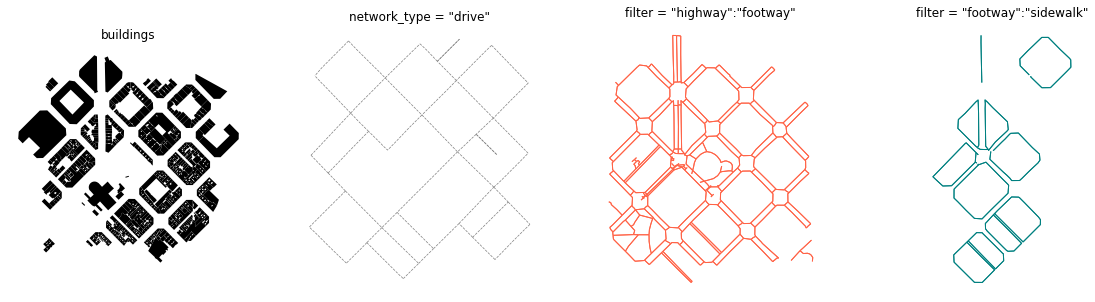

In [13]:
# plot
x = 0.0005

fig, ax = plt.subplots(1,4,figsize=(20,5))

# Plot buildings
bpol.plot(ax=ax[0], facecolor='black', alpha=1)
ax[0].set_title('buildings')
ax[0].axis('off')

# Plot street RCL
edges1.plot(ax=ax[1], linewidth=0.7, edgecolor=ecol1, linestyle = 'dashed')
ax[1].set_title('network_type = "drive"')
ax[1].axis('off')

# Plot street PCL
edges2.plot(ax=ax[2], linewidth=1, edgecolor=ecol2)
ax[2].set_title('filter = "highway":"footway"')
ax[2].axis('off')

# Plot street PCL
edges3.plot(ax=ax[3], linewidth=1, edgecolor=ecol3)
ax[3].set_title('filter = "footway":"sidewalk"')
ax[3].axis('off')

# limits
# ax.set_xlim([bbox[0]+x, bbox[2]-x])
# ax.set_ylim([bbox[1]+x, bbox[3]-x])

plt.draw()
plt.savefig("test.png", dpi = 200)

In [14]:
tagsh = {'highway': 'footway'}
tagss = {'footway': 'sidewalk'}
tagsb = {'building': True}

# get data
# RCL, network_type = "drive"
Gr = ox.graph_from_point(center_point = point, dist = dist, dist_type = "bbox", network_type = "drive", simplify = "TRUE", 
                        retain_all = "TRUE", truncate_by_edge = "FALSE", clean_periphery = "TRUE")

# graphs to gdfs
# Retrieve nodes and edges
edges1 = ox.graph_to_gdfs(Gr, nodes=False)

# PCL, {'highway': 'footway'}
Gph = ox.geometries_from_point(center_point = point, tags = tagsh, dist = dist)

# PCL, {'footway': 'sidewalk'}
Gps = ox.geometries_from_point(center_point = point, tags = tagss, dist = dist)

# buildings
bdgs = ox.geometries_from_point(center_point = point, tags = tagsb, dist = dist)
# select only 'polygon' features
bpol = bdgs.loc[bdgs['geometry'].geom_type=='Polygon']
# buildings bbox
bbox = bpol.total_bounds

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/_vectorized.py:106: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  arr[:] = data
/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/_vectorized.py:106: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  arr[:] = data
/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/_vectorized.py:106: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interf

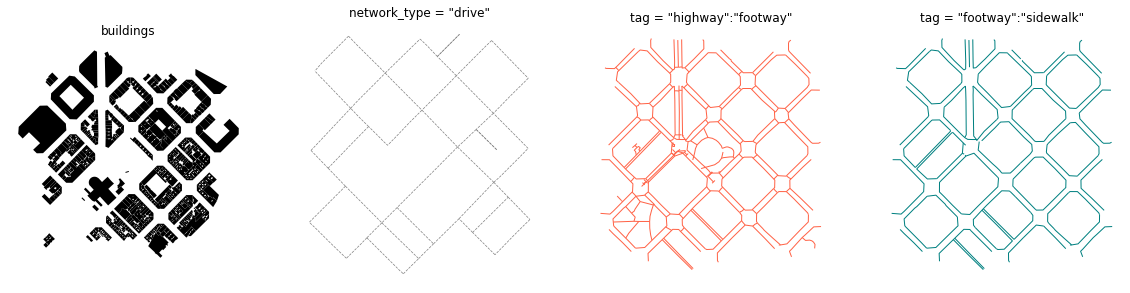

In [17]:
# plot
x = 0.0005

fig, ax = plt.subplots(1,4,figsize=(20,5))

# Plot buildings
bpol.plot(ax=ax[0], facecolor='black', alpha=1)
ax[0].set_title('buildings')
ax[0].axis('off')

# Plot street RCL
edges1.plot(ax=ax[1], linewidth=0.7, edgecolor=ecol1, linestyle = 'dashed')
ax[1].set_title('network_type = "drive"')
ax[1].axis('off')

# Plot street PCL
Gph.plot(ax=ax[2], linewidth=1, edgecolor=ecol2)
ax[2].set_title('tag = "highway":"footway"')
ax[2].axis('off')

# Plot street PCL
Gps.plot(ax=ax[3], linewidth=1, edgecolor=ecol3)
ax[3].set_title('tag = "footway":"sidewalk"')
ax[3].axis('off')

# limits
# ax.set_xlim([bbox[0]+x, bbox[2]-x])
# ax.set_ylim([bbox[1]+x, bbox[3]-x])

plt.draw()
plt.savefig("test.png", dpi = 200)